---
### Perceptron, K-NN and cross-validation
---

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
#### I. Perceptron and K-NN

We will work with a dataset about wines, which can be downloaded from pamplemousse. Be careful not to open the CSV file with Excel and save it afterward, as Excel may alter the file. We load it as a Pandas `DataFrame` and display its first five rows as follows:

In [404]:
data = pd.read_csv('data/wine_dataset.csv')
data.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


**Question 1.** — Examine the `DataFrame` data. How many examples and how many variables does the dataset contain?

In [405]:
print(f"Number of examples: {data.shape[0]}.")
print(f"Number of variables: {data.shape[1]}.")

Number of examples: 6497.
Number of variables: 13.


We aim to predict the type of wine (red or white) based on its chemical properties. The variable `quality` is not a chemical property but a subjective rating given by wine tasters; it is not relevant for our problem, so we will remove it. Pandas allows us to manipulate (in this case, delete) columns by referring to their names.

In [406]:
data = data.drop(columns=['quality'])

Before building predictors, we want to select a small number of explanatory variables (say four): those that seem most promising for predicting wine type. For example, for the variable `fixed_acidity`, we can visualize its distribution for each wine type as follows:

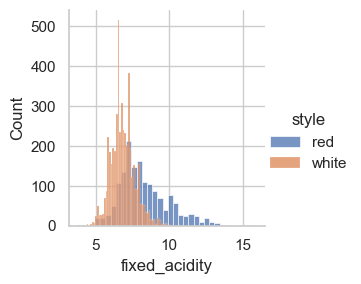

In [407]:
g = sns.FacetGrid(data=data, hue='style')
g.map(sns.histplot, 'fixed_acidity').add_legend()
plt.show()

**Question 2.** — Produce a figure that contains the visualizations for each explanatory variable. You can use a `for` loop, as well as `data.columns`, which provides the list of variable names.

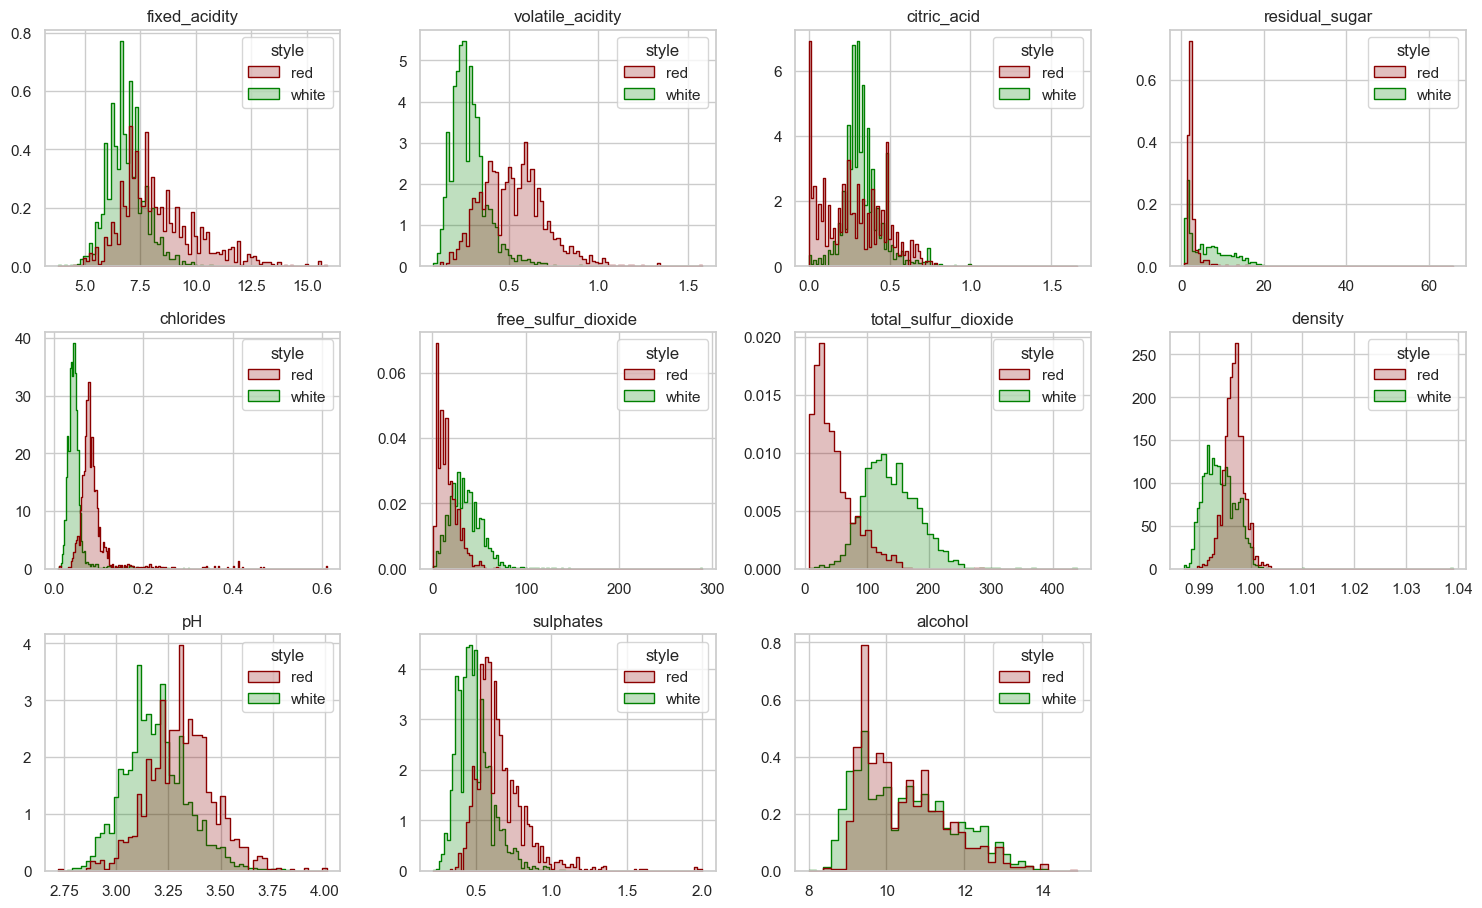

In [408]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

# Red for red wine, Green for white
custom_palette = {'red': 'darkred', 'white': 'green'}

# Loop over all explanatory variables (except style)
for i, col in enumerate(data.columns):
    if col != 'style':
        plt.subplot(4, 4, i + 1)
        sns.histplot(data=data, x=col, hue='style', palette=custom_palette,
                     element='step', stat='density', common_norm=False)
        plt.title(f"{col}")
        plt.xlabel("")
        plt.ylabel("")

plt.tight_layout()
plt.show()

**Question 3.** — Based on the generated figures, choose four variables that appear to be the most promising for predicting the type of wine. Create a `DataFrame` `data_reduced` containing only these selected variables as well as the target variable.

In [409]:
selected_vars = ['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'sulphates']
# Worth to try also: fixed_acidity

data_reduced = data[selected_vars + ['style']]
data_reduced.head()

,volatile_acidity,chlorides,total_sulfur_dioxide,sulphates,style
0,0.70,0.076,34.0,0.56,red
1,0.88,0.098,67.0,0.68,red
2,0.76,0.092,54.0,0.65,red
3,0.28,0.075,60.0,0.58,red
4,0.70,0.076,34.0,0.56,red


We will now split the dataset into training and test samples. For this, we can use a dedicated function provided by `scikit-learn`, which also takes care of shuﬄing the order of the examples.

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
# Separate features and target
explanatory = data_reduced.drop(columns='style')
target      = data_reduced['style']

X_train, X_test, y_train, y_test = train_test_split(explanatory, target, random_state=87)

**Question 4.** — Observe the obtained samples and determine the ratio of their sizes.

In [412]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Test/Train size ratio: {len(X_test)/len(X_train):.4f}")

Training set size: 4872
Test set size: 1625
Test/Train size ratio: 0.3335


We will now train a logistic regression model.

**Question 5.** — Display the training and test errors of the constructed predictor. Remember to use the `f.score()` function.

We define:
$$
\begin{cases}
\text{train\_accuracy} = f.\text{score}(X_{\text{train}}, y_{\text{train}})\\
\text{test\_accuracy} = f.\text{score}(X_{\text{test}}, y_{\text{test}})
\end{cases}
$$

The **error rates** are then computed as the complement of the accuracies:
$$
\begin{cases}
\text{train\_error} = 1 - \text{train\_accuracy}\\
\text{test\_error} = 1 - \text{test\_accuracy}
\end{cases}
$$

*NB*: A lower error indicates a better fit to the corresponding dataset.

In [413]:
from sklearn.linear_model import LogisticRegression

In [414]:
f = LogisticRegression()
f.fit(X_train, y_train)
print(f"Training error (LogReg): {1 - f.score(X_train, y_train):.4f}")
print(f"Test error (LogReg): {1 - f.score(X_test, y_test):.4f}")

Training error (LogReg): 0.0296
Test error (LogReg): 0.0363


**Question 6.** — Train a Perceptron predictor, as well as $k$-NN predictors (for diﬀerent values of $k$). Compare the results.

In [415]:
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [416]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print(f"Training error (Perceptron): {1 - perceptron.score(X_train, y_train):.4f}")
print(f"Test error (Perceptron): {1 - perceptron.score(X_test, y_test):.4f}")

Training error (Perceptron): 0.0823
Test error (Perceptron): 0.0960


In [417]:
for k in [1, 3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate accuracy and error
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)

    print(f"k = {k:02d}  →  Training error: {1 - knn.score(X_train, y_train):.4f}   |   Test error: {1 - knn.score(X_test, y_test):.4f}")

k = 01  →  Training error: 0.0004   |   Test error: 0.0400
k = 03  →  Training error: 0.0228   |   Test error: 0.0578
k = 05  →  Training error: 0.0343   |   Test error: 0.0603
k = 10  →  Training error: 0.0458   |   Test error: 0.0689


The Perceptron reaches 8.2% training error and 9.6% test error, showing decent but limited accuracy. The k-NN model performs best at $k = 1$, with near-perfect training accuracy and the **lowest test error (4%)**, indicating **strong generalization**, not overfitting. As $k$ increases, both errors rise slightly, reflecting the usual bias-variance trade-off. In this setting, $k = 1$ is the most effective, while the Perceptron remains a more stable alternative for noisier data.

**Question 7.** — Explain what the confusion matrix represents.

In [418]:
print("Confusion matrix (LogReg on test set):")
pd.crosstab(y_test, f.predict(X_test))

Confusion matrix (LogReg on test set):


col_0,red,white
style,,
red,383,41
white,18,1183


The confusion matrix summarizes the performance of the logistic regression classifier by showing the number of correct and incorrect predictions for each class (red and white wines). Each row represents the true class, and each column represents the predicted class. Here:

- The first row shows how red wines were classified:
  - 383 red wines were correctly classified as red.
  - 41 red wines were incorrectly classified as white.

- The second row shows how white wines were classified:
  - 1183 white wines were correctly classified as white.
  - 18 white wines were incorrectly classified as red.

**Question 8.** — From `X_test` and `y_test`, construct a test subsample `X_test_` and `y_test_` that contains an equal number of red and white wines. You may use the `resample` function, whose documentation you can consult, and which can be imported using the following command:

In [419]:
from sklearn.utils import resample

In [420]:
# Create a copy of the test set and add the target variable for easier manipulation
test_df = X_test.copy()
test_df['style'] = y_test

# Find the number of samples in the minority class (red or white, whichever is fewer)
min_class_size = y_test.value_counts().min()

# Randomly sample an equal number of red and white with a fixed random seed
reds = resample(test_df[test_df['style'] == 'red'], 
                replace=False, 
                n_samples=min_class_size, 
                random_state=87)

whites = resample(test_df[test_df['style'] == 'white'], 
                  replace=False, 
                  n_samples=min_class_size, 
                  random_state=87)

# Combine the two balanced subsets to form a new balanced test set
balanced_test_df = pd.concat([reds, whites])

# Separate features and labels for this balanced test set
X_test_ = balanced_test_df.drop(columns='style')
y_test_ = balanced_test_df['style']

**Question 9.** — Evaluate the performance of the constructed predictors on this subsample. Comment on the results.

In [421]:
print(f"Balanced test accuracy (  LogReg  ): {f.score(X_test_, y_test_):.4f}")
print(f"Balanced test accuracy (Perceptron): {perceptron.score(X_test_, y_test_):.4f}")

Balanced test accuracy (  LogReg  ): 0.9469
Balanced test accuracy (Perceptron): 0.8243


On the balanced test set, **Logistic Regression** achieves an accuracy of **94.7%**, while the **Perceptron** drops to **82.4%**. This confirms that Logistic Regression is significantly better at handling **both red and white wines** fairly. The Perceptron, by contrast, likely struggled more with one of the classes — its drop in performance suggests it's **less robust to class balance** and may have overfitted to the majority class in the original dataset. Overall, Logistic Regression generalizes better in a balanced setting.

**Question 10.** — Similarly, create a balanced training subsample `X_train_` and `y_train_`. Train the predictors on this subsample and observe their scores. Comment on the results.

In [422]:
# Create a balanced training set with equal numbers of red and white wines
train_df = X_train.copy()
train_df['style'] = y_train

# Determine how many samples to draw (based on minority class size)
min_class_size = y_train.value_counts().min()

# Randomly sample the same number of red and white wines
reds = resample(train_df[train_df['style'] == 'red'], replace=False, n_samples=min_class_size, random_state=87)
whites = resample(train_df[train_df['style'] == 'white'], replace=False, n_samples=min_class_size, random_state=87)

# Combine into a balanced training DataFrame
balanced_train_df = pd.concat([reds, whites])

# Separate features and target
X_train_ = balanced_train_df.drop(columns='style')
y_train_ = balanced_train_df['style']

# Train logistic regression on the balanced training set
f_bal = LogisticRegression(max_iter=1000)
f_bal.fit(X_train_, y_train_)

# Evaluate on balanced train and test sets
print(f"Balanced train accuracy (LogReg): {f_bal.score(X_train_, y_train_):.2f}")
print(f"Balanced test accuracy (LogReg): {f_bal.score(X_test_, y_test_):.2f}")

Balanced train accuracy (LogReg): 0.96
Balanced test accuracy (LogReg): 0.96


After training on a balanced dataset, Logistic Regression achieves **96% accuracy on both the balanced training and test sets**. This indicates that the model has learned to distinguish red and white wines **effectively and symmetrically**, without overfitting. The high and nearly identical accuracy on both sets suggests **good generalization** and **robustness to class imbalance**. Training on a balanced set helped the model better handle both classes equally, which may have been underrepresented or biased in the original training.

**Question 11.** — Train the estimators using the full set of initial explanatory variables. Comment on the results.

In [423]:
# Use all available features (no reduction to 4 variables)
X_full = data.drop(columns='style')
y_full = data['style']

# Split full data into train and test sets (80/20 split)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=87
)

# Train logistic regression on all features
f_full = LogisticRegression(max_iter=1000)
f_full.fit(X_train_full, y_train_full)

# Print training and test accuracy
print(f"Full-feature train accuracy (LogReg): {f_full.score(X_train_full, y_train_full):.2f}")
print(f"Full-feature test accuracy (LogReg): {f_full.score(X_test_full, y_test_full):.2f}")

Full-feature train accuracy (LogReg): 0.99
Full-feature test accuracy (LogReg): 0.98


With a training accuracy of **99%** and test accuracy of **98%**, Logistic Regression performs **exceptionally well** when using all available features. The very small gap between training and test accuracy suggests **minimal overfitting** and excellent generalization. This confirms that the additional chemical variables provide meaningful information for distinguishing red and white wines, and that the model can effectively learn from the full feature set without losing robustness. Overall, this is a strong indication that using all features yields the best performance in this classification task.

---
#### II. $k$-NN and cross-validation

We consider a character recognition problem. The dataset contains images of handwritten digits, along with their corresponding labels. Our goal is to build a predictor that can recognize the digit from the image this is therefore a classification problem. We will now load the dataset.

In [424]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [425]:
print(X[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


We can see that each entry, for example `X[1]` above, is a 1-dimensional `array` of size 64. It represents an image of size 8 x 8 pixels. Each component is an integer between 0 and 16 and represents the grayscale intensity of the corresponding pixel. For each entry, we can use the `.reshape()` function to convert it into a 2-dimensional `array` of size 8 x 8.

In [426]:
print(X[1].reshape(8,8))

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


This allows us to visualize the corresponding image using the `plt.imshow()` function.

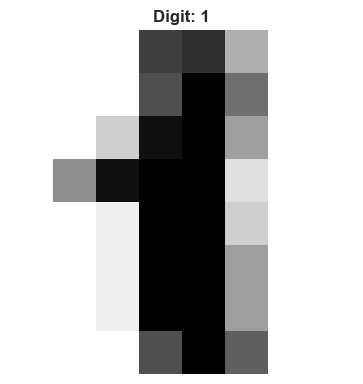

In [427]:
plt.figure(figsize=(4, 4))
plt.imshow(X[1].reshape(8, 8), cmap='gray_r')
plt.title(f"Digit: {y[1]}", fontweight='bold')
plt.axis('off')  # Hide axis ticks for a cleaner look
plt.tight_layout()
plt.show()

**Question 12.** — Are the diﬀerent classes (0, 1, ..., 8, 9) present in approximately equal quantities in the dataset?

In [428]:
# Count how many times each digit appears in the dataset
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Digit {label}: {count} samples")

# Alternative: using pandas
#pd.Series(y).value_counts().sort_index()

Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples


We will build $k$-NN predictors. The predictions made by these algorithms are slow to compute when the training set is large. Therefore, we will try to limit the size of the training set.

**Question 13.** — Partition the dataset into two samples: a sample $(X_{\text{cv}}, y_{\text{cv}})$ of size 200, which will be used for cross-validation, and a test sample $(X_{\text{test}}, y_{\text{test}})$, which will be used for the final evaluation. You may use the `train_test_split` function seen in the previous lab session, in which the optional argument `train_size` can be specified.

In [429]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, train_size=200, stratify=y, random_state=87)

We can now perform cross-validation on the sample $(X_{\text{cv}}, y_{\text{cv}})$. For example, we will consider the $k$-NN algorithm with $k = 5$, and perform 7-fold cross-validation. We will use the `cross_val_score` function provided by `scikit-learn`.

In [430]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_cv, y_cv, cv=7)

**Question 14.** — What does the variable `scores` defined above contain? Deduce from it the validation score of the 7-fold cross-validation for the 5-NN algorithm.

In [431]:
print("7-fold cross-validation results (k=5):")
for i, score in enumerate(scores, 1):
    print(f" - Fold {i}: validation accuracy = {score:.4f}")
print(f"\nMean CV score (k=5): {scores.mean():.4f}")

7-fold cross-validation results (k=5):
 - Fold 1: validation accuracy = 1.0000
 - Fold 2: validation accuracy = 0.9310
 - Fold 3: validation accuracy = 0.8966
 - Fold 4: validation accuracy = 0.9310
 - Fold 5: validation accuracy = 0.8929
 - Fold 6: validation accuracy = 0.9643
 - Fold 7: validation accuracy = 0.8571

Mean CV score (k=5): 0.9247


For a range of values of the hyperparameter $k$ (for example $k \in \{1, \ldots, 20\}$), the training and validation scores from 7-fold cross-validation can be computed as follows:

In [432]:
from sklearn.model_selection import validation_curve

k_range = range(1, 21)
train_scores, valid_scores = validation_curve(
    estimator=KNeighborsClassifier(),
    X=X_cv,
    y=y_cv,
    param_name="n_neighbors",
    param_range=k_range,
    cv=7
)

**Question 15.** — Plot the corresponding validation curves. Is it necessary to try other values of $k$? Define a variable
$k_best$ equal to the best value of the hyperparameter $k$ based on the above results.

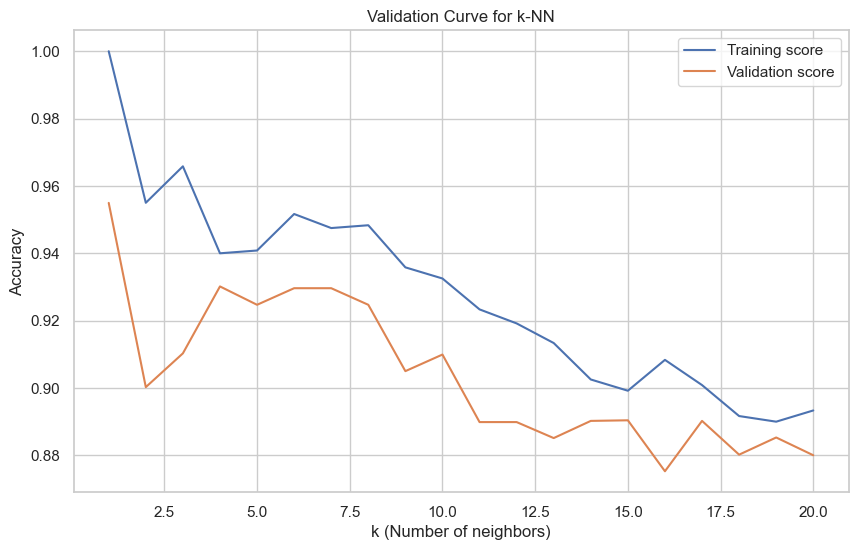

Best k according to validation: k_best = 1


In [433]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores.mean(axis=1), label="Training score")
plt.plot(k_range, valid_scores.mean(axis=1), label="Validation score")
plt.xlabel("k (Number of neighbors)")
plt.ylabel("Accuracy")
plt.title("Validation Curve for k-NN")
plt.legend()
plt.grid(True)
plt.show()

k_best = k_range[np.argmax(valid_scores.mean(axis=1))]
print(f"Best k according to validation: k_best = {k_best}")

The optimal number of neighbors is $k=1$. There is no need to test larger values of $k$, as performance consistently drops beyond that point.

We now want to plot the learning curve for $k=k_{\text{best}}$, corresponding to training set sizes from 10 to 150, in
increments of 5. The following code gives the corresponding 7-fold cross-validation scores:

In [434]:
from sklearn.model_selection import learning_curve

train_size_range = range(10, 151, 5) # Train on sets of size 10, 15, 20, 25, ..., 150
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),  # use best k found before (here: k=1)
    X_cv,                                      # features
    y_cv,                                      # labels
    train_sizes=train_size_range,              # how many training examples to use
    cv=7                                       # perform 7-fold CV for each size
)

**Question 16.** — Plot the corresponding learning curve. Would it be interesting to use larger training samples? If so,
return to Question 2 using a larger training set.

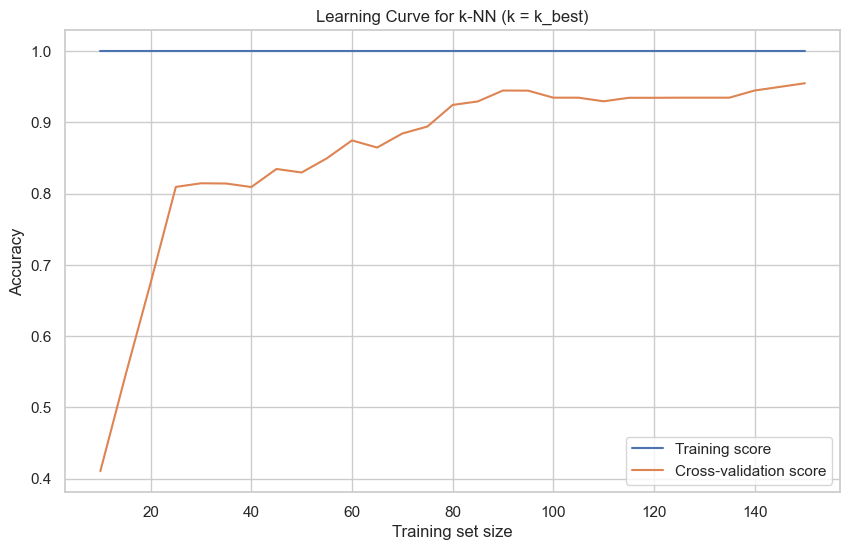

In [435]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), label="Cross-validation score")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for k-NN (k = k_best)")
plt.legend()
plt.grid(True)
plt.show()

The training score remains at 100% for all sizes, as expected with $k = 1$, while the validation score improves rapidly before plateauing around 90%, indicating diminishing returns from additional data. The gap between training and validation scores stabilizes, indicating the model's variance has leveled off. Overall, the model generalizes well, and adding more data beyond \~100 samples is unlikely to significantly improve performance.

**Question 17.** — Plot a learning curve where the score is obtained using simple validation (i.e., without cross-validation). Explain the advantage of using cross-validation in this context.

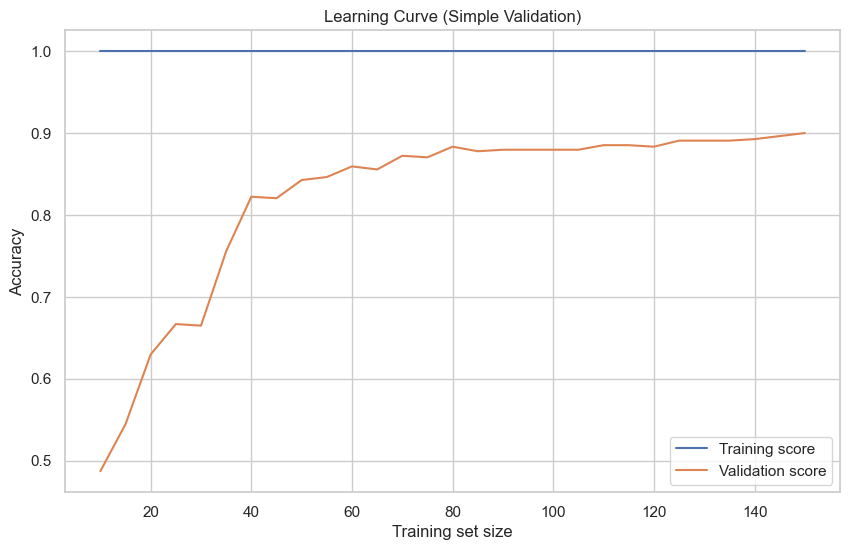

In [436]:
train_sizes = range(10, 151, 5)
train_scores = []
valid_scores = []
X_train_simple, X_val_simple, y_train_simple, y_val_simple = train_test_split(
    X, y, test_size=0.3, random_state=87)  # simple validation, no cross-validation here

# Loop over increasing training sizes
for size in train_sizes:
    # Use the first 'size' examples from the training portion
    X_subset = X_train_simple[:size]
    y_subset = y_train_simple[:size]

    # Train a k-NN model using the best k found previously
    model = KNeighborsClassifier(n_neighbors=k_best)
    model.fit(X_subset, y_subset)

    # Evaluate accuracy on the training subset
    train_score = model.score(X_subset, y_subset)

    # Evaluate accuracy on the fixed validation set
    val_score = model.score(X_val_simple, y_val_simple)

    # Store results for plotting
    train_scores.append(train_score)
    valid_scores.append(val_score)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training score")
plt.plot(train_sizes, valid_scores, label="Validation score")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Simple Validation)")
plt.legend()
plt.grid(True)
plt.show()

When using **simple validation**, the learning curve depends on a **single split** between training and validation sets. This makes it **sensitive to variance**: if the validation set is not representative, performance may appear misleadingly high or low. This is especially problematic with **small datasets**, where each example carries more weight.

In contrast, **cross-validation averages performance across multiple train/test splits**, providing a **more stable and reliable estimate** of how the model generalizes. It reduces the influence of random sampling and makes the learning curve smoother and more trustworthy, particularly when evaluating how performance evolves with training size.

**Question 18.** — Train the $k$-NN predictor (with $k = k_{\text{best}}$) using $(X_{\text{cv}}, y_{\text{cv}})$ as the training set. Compute its test score using the sample $(X_{\text{test}}, y_{\text{test}})$. Also display the confusion matrix on the test set. What is the most frequent classification error?

Test accuracy with k_best = 1: 0.9512


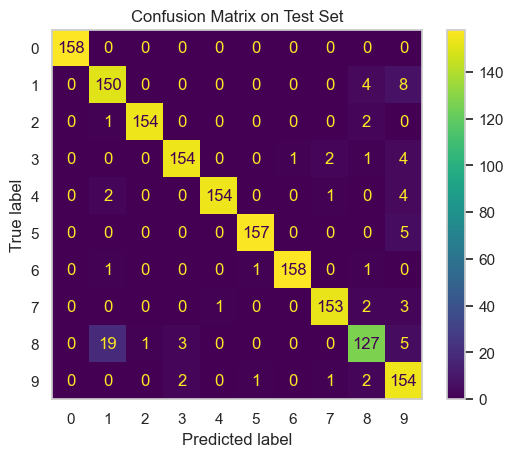

Most frequent misclassification: 8 mistaken as 1


In [437]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = KNeighborsClassifier(n_neighbors=k_best)
final_model.fit(X_cv, y_cv)
test_score = final_model.score(X_test, y_test)
print(f"Test accuracy with k_best = {k_best}: {test_score:.4f}")

cm = confusion_matrix(y_test, final_model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names).plot()
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()

most_common_error = np.unravel_index(np.argmax(cm - np.diag(np.diag(cm))), cm.shape)
print(f"Most frequent misclassification: {most_common_error[0]} mistaken as {most_common_error[1]}")

**Question 19.** — Write a function `shift_image` that takes as arguments:

1. a 2-dimensional array named `image` of size $8 \times 8$ (representing an image), and  
2. a 1-dimensional array named `direction` of size 2,

and returns the image translated by the vector of coordinates given by `direction`. The image content should be cropped accordingly on the sides. Verify that the function works correctly by visualizing a few translated images.

In [438]:
def shift_image(image, direction):
    shifted = np.zeros_like(image)  # Start with a blank (zeroed) image
    dx, dy = direction              # dx: vertical shift, dy: horizontal shift

    # Define source and destination slices for vertical shift (x-axis)
    if dx >= 0:
        x_slice_from = slice(0, -dx or None)  # from top part of image
        x_slice_to = slice(dx, None)          # to bottom-shifted part
    else:
        x_slice_from = slice(-dx, None)
        x_slice_to = slice(0, dx)

    # Define source and destination slices for horizontal shift (y-axis)
    if dy >= 0:
        y_slice_from = slice(0, -dy or None)
        y_slice_to = slice(dy, None)
    else:
        y_slice_from = slice(-dy, None)
        y_slice_to = slice(0, dy)

    # Copy shifted region from original image to new image
    shifted[x_slice_to, y_slice_to] = image[x_slice_from, y_slice_from]
    return shifted

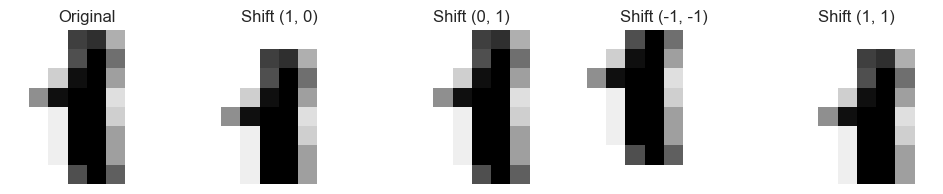

In [439]:
directions = [(0, 0), (1, 0), (0, 1), (-1, -1), (1, 1)]

plt.figure(figsize=(12, 2))
for i, direction in enumerate(directions):
    plt.subplot(1, len(directions), i + 1)
    img = shift_image(X[1].reshape(8, 8), direction)
    plt.imshow(img, cmap=plt.cm.gray_r)
    title = "Original" if direction == (0, 0) else f"Shift {direction}"
    plt.title(title)
    plt.axis('off')
plt.show()


**Question 20.** — Augment the dataset by translating all examples with each of the following vectors:

$$
(-1, 0), \quad (1, 0), \quad (0, -1), \quad (0, 1), \quad (-1, -1), \quad (-1, 1), \quad (1, -1), \quad (1, 1)
$$

Then, build a $k$-NN predictor by choosing the hyperparameter $k$ through cross-validation, and evaluate its score on a test sample. Compare the resulting predictor with the one from Question 7. You may initially use a cross-validation sample of size 400, and then decide whether it is worthwhile to increase the sample size.

Augmented dataset size: 1800


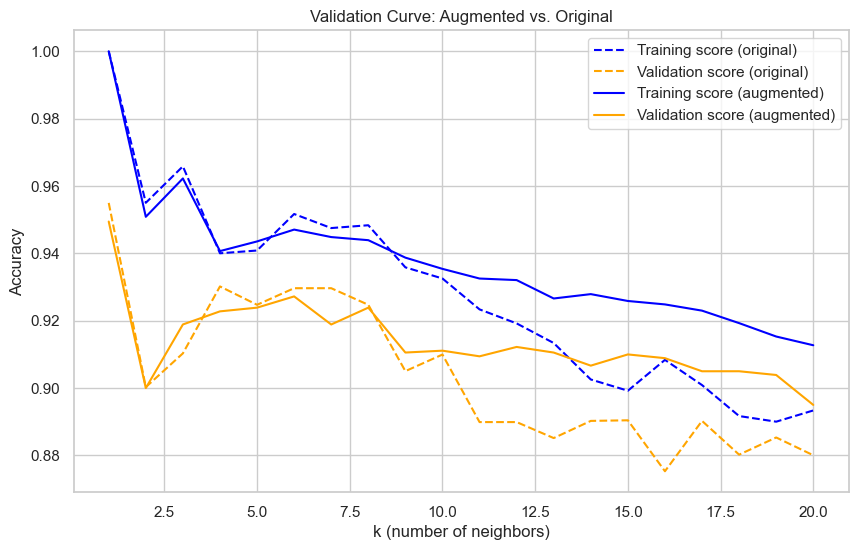


--- Comparison Summary ---
Original data     → Best k: 1, Validation Acc: 0.9550, Test Acc: 0.9512
Augmented data    → Best k: 1, Validation Acc: 0.9494, Test Acc: 0.9618


In [440]:
# --- Step 1: Data Augmentation ---
translations = [(-1, 0), (1, 0), (0, -1), (0, 1),
                (-1, -1), (-1, 1), (1, -1), (1, 1)]

X_aug = []
y_aug = []

# Augment the training data (X_cv, y_cv)
for i in range(len(X_cv)):
    image = X_cv[i].reshape(8, 8)
    label = y_cv[i]

    X_aug.append(image.flatten())  # Original
    y_aug.append(label)

    for direction in translations:
        shifted = shift_image(image, direction)
        X_aug.append(shifted.flatten())  # Shifted
        y_aug.append(label)

X_aug = np.array(X_aug)
y_aug = np.array(y_aug)

print(f"Augmented dataset size: {X_aug.shape[0]}")

# --- Step 2: Validation curves ---
k_range = range(1, 21)

# Original data
train_scores_orig, valid_scores_orig = validation_curve(
    KNeighborsClassifier(),
    X_cv, y_cv,
    param_name="n_neighbors",
    param_range=k_range,
    cv=7
)

# Augmented data
train_scores_aug, valid_scores_aug = validation_curve(
    KNeighborsClassifier(),
    X_aug, y_aug,
    param_name="n_neighbors",
    param_range=k_range,
    cv=7
)

# --- Step 3: Plot ---
plt.figure(figsize=(10, 6))

plt.plot(k_range, train_scores_orig.mean(axis=1), label="Training score (original)", linestyle='--', color='blue')
plt.plot(k_range, valid_scores_orig.mean(axis=1), label="Validation score (original)", linestyle='--', color='orange')

plt.plot(k_range, train_scores_aug.mean(axis=1), label="Training score (augmented)", color='blue')
plt.plot(k_range, valid_scores_aug.mean(axis=1), label="Validation score (augmented)", color='orange')

plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("Validation Curve: Augmented vs. Original")
plt.legend()
plt.grid(True)
plt.show()

# --- Step 4: Select best k and evaluate both models ---

# Original
k_best_orig = k_range[np.argmax(valid_scores_orig.mean(axis=1))]
val_acc_orig = valid_scores_orig.mean(axis=1).max()
final_model_orig = KNeighborsClassifier(n_neighbors=k_best_orig)
final_model_orig.fit(X_cv, y_cv)
test_acc_orig = final_model_orig.score(X_test, y_test)

# Augmented
k_best_aug = k_range[np.argmax(valid_scores_aug.mean(axis=1))]
val_acc_aug = valid_scores_aug.mean(axis=1).max()
final_model_aug = KNeighborsClassifier(n_neighbors=k_best_aug)
final_model_aug.fit(X_aug, y_aug)
test_acc_aug = final_model_aug.score(X_test, y_test)

# --- Step 5: Print comparison ---
print("\n--- Comparison Summary ---")
print(f"Original data     → Best k: {k_best_orig}, Validation Acc: {val_acc_orig:.4f}, Test Acc: {test_acc_orig:.4f}")
print(f"Augmented data    → Best k: {k_best_aug}, Validation Acc: {val_acc_aug:.4f}, Test Acc: {test_acc_aug:.4f}")

**Summary Analysis**

* Both models select $k = 1$ as optimal.
* **Validation accuracy** slightly decreases with augmentation (from 95.5% to 94.9%) due to added complexity.
* However, **test accuracy improves** (from 95.1% to **96.2%**), showing better generalization.
* Training accuracy remains perfect in both cases, confirming no underfitting.

**Interpretation**

Data augmentation introduces realistic variations (e.g., small shifts), making the task harder — but it pays off. The model becomes more robust and less sensitive to positioning, as shown by the **higher test accuracy**.

**Conclusion**

> Augmentation reduces overfitting and improves real-world performance, even for a simple $k$-NN. The test gain confirms its value, especially when generalization matters more than in-sample scores.
